In [108]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from google.colab import drive, files

from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, f1_score
import tensorflow as tf
from tensorflow import keras

# Display all columns for better visualization
pd.set_option('display.max_columns', None)

# Initial data reading
files.upload()
df = pd.read_csv("diabetic_data_processed.csv")
print("The original data has {} features and {} observations".format(df.shape[1], df.shape[0]))
display(df.head(3))
display(df.info())

Saving diabetic_data_processed.csv to diabetic_data_processed (2).csv
The original data has 41 features and 101766 observations


,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,Caucasian,Female,[0-10),5,18,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Unnamed: 0                101766 non-null  int64 
 1   race                      99493 non-null   object
 2   gender                    101766 non-null  object
 3   age                       101766 non-null  object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   num_lab_procedures        101766 non-null  int64 
 9   num_procedures            101766 non-null  int64 
 10  num_medications           101766 non-null  int64 
 11  number_outpatient         101766 non-null  int64 
 12  number_emergency          101766 non-null  int64 
 13  number_inpatient          101766 non-null  int64 
 14  numb

None

In [109]:
df

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,Caucasian,Female,[0-10),5,18,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,0,0,0,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,0,0,1,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,1,0,0,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,101764,Caucasian,Female,[80-90),2,3,7,10,45,2,21,0,0,1,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [110]:
X = df.drop(['readmitted','Unnamed: 0'], axis=1)
y = df['readmitted']

numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()

scaler = RobustScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [118]:
X = pd.get_dummies(X, columns=[e for e in X.columns if X[e].dtype == object], drop_first=True)

fs = SelectKBest(score_func=f_classif, k=len(X.columns))
X_selected = fs.fit_transform(X, y)

print('Size Before SelectKBest = {}'.format(X.shape))

new_features = [] # The list of features less than the p-values
drop_features = [] # The list of features higher than the p-values

for i in range(len(X.columns)):
    if fs.pvalues_[i] <= 0.01 and fs.scores_[i] >= 5: # Here we use a threshold of 0.01 and a t_score of 5
        new_features.append(X.columns[i])
    else:
        drop_features.append(X.columns[i])

X_selected_final =  pd.DataFrame(X_selected)
X_selected_final.columns = X.columns
X_selected_final = X_selected_final[new_features]

print('Size After SelectKBest = {}'.format(X_selected_final.shape))

Size Before SelectKBest = (101766, 82)
Size After SelectKBest = (101766, 49)


In [119]:
X_selected_final

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>300,max_glu_serum_None,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,glimepiride_No,glimepiride_Steady,glipizide_No,glipizide_Steady,pioglitazone_No,pioglitazone_Steady,rosiglitazone_No,rosiglitazone_Steady,acarbose_No,acarbose_Steady,insulin_No,insulin_Steady,insulin_Up,change_No,diabetesMed_Yes
0,2.0,5.666667,-1.000000,-0.75,-0.115385,-0.5,-1.4,0.0,0.0,0.0,-2.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.000000,0.000000,-0.25,0.576923,-0.5,0.3,0.0,0.0,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.000000,0.000000,-0.50,-1.269231,2.0,-0.2,2.0,0.0,1.0,-0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,0.000000,0.000000,-0.50,0.000000,0.0,0.1,0.0,0.0,0.0,-0.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.000000,0.000000,-0.75,0.269231,-0.5,-0.7,0.0,0.0,0.0,-1.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.0,0.666667,0.000000,-0.25,0.269231,-0.5,0.1,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
101762,0.0,1.000000,-0.333333,0.25,-0.423077,1.0,0.3,0.0,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
101763,0.0,0.000000,0.000000,-0.75,0.346154,-0.5,-0.6,1.0,0.0,0.0,1.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
101764,0.5,0.666667,0.000000,1.50,0.038462,0.5,0.6,0.0,0.0,1.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [120]:
# LightGBM has some troubles with special characters in feature ames, so we use regex to clean the names
X_selected_final = X_selected_final.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

XTrain, XTest, yTrain, yTest = train_test_split(X_selected_final, y, test_size=0.2, random_state=0)

In [121]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [84]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Árbol de clasificación

In [161]:
clfTree = DecisionTreeClassifier()
clfTree.fit(XTrain, yTrain)

DecisionTreeClassifier()

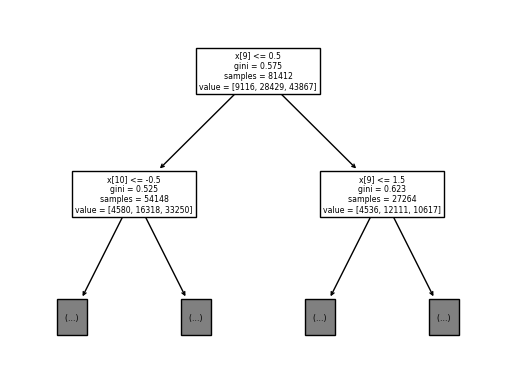

In [162]:
plot_tree(clfTree,max_depth=1)
plt.show()

In [163]:
y_pred = clfTree.predict(XTest)

In [164]:
y_pred

array(['>30', '<30', 'NO', ..., 'NO', 'NO', 'NO'], dtype=object)

In [165]:
accuracy1 = accuracy_score(yTest, y_pred)
conf_matrix = confusion_matrix(yTest, y_pred)
class_report = classification_report(yTest, y_pred)

In [166]:
# Imprimir resultados
print(f'Accuracy1: {accuracy1}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy1: 0.4698339392748354

Confusion Matrix:
[[ 380  898  963]
 [ 913 2869 3334]
 [1159 3524 6314]]

Classification Report:
              precision    recall  f1-score   support

         <30       0.15      0.17      0.16      2241
         >30       0.39      0.40      0.40      7116
          NO       0.60      0.57      0.58     10997

    accuracy                           0.47     20354
   macro avg       0.38      0.38      0.38     20354
weighted avg       0.48      0.47      0.47     20354





#Bagging


In [167]:
clfBag = BaggingClassifier(n_estimators=10, random_state=0)
clfBag.fit(XTrain, yTrain)

BaggingClassifier(random_state=0)

In [168]:
y_pred = clfBag.predict(XTest)

In [169]:
accuracy2 = accuracy_score(yTest, y_pred)
conf_matrix = confusion_matrix(yTest, y_pred)
class_report = classification_report(yTest, y_pred)

In [170]:
# Imprimir resultados
print(f'Accuracy2: {accuracy2}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy2: 0.528348236218925

Confusion Matrix:
[[ 195  969 1077]
 [ 414 3197 3505]
 [ 368 3267 7362]]

Classification Report:
              precision    recall  f1-score   support

         <30       0.20      0.09      0.12      2241
         >30       0.43      0.45      0.44      7116
          NO       0.62      0.67      0.64     10997

    accuracy                           0.53     20354
   macro avg       0.42      0.40      0.40     20354
weighted avg       0.51      0.53      0.51     20354



#Random forest

In [171]:
clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(XTrain, yTrain)

RandomForestClassifier(random_state=0)

In [172]:
y_pred = clfRF.predict(XTest)

In [174]:
accuracy3 = accuracy_score(yTest, y_pred)
conf_matrix = confusion_matrix(yTest, y_pred)
class_report = classification_report(yTest, y_pred)

In [175]:
# Imprimir resultados
print(f'Accuracy3: {accuracy3}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy3: 0.5777734106318169

Confusion Matrix:
[[  54  866 1321]
 [  62 2777 4277]
 [  38 2030 8929]]

Classification Report:
              precision    recall  f1-score   support

         <30       0.35      0.02      0.05      2241
         >30       0.49      0.39      0.43      7116
          NO       0.61      0.81      0.70     10997

    accuracy                           0.58     20354
   macro avg       0.48      0.41      0.39     20354
weighted avg       0.54      0.58      0.53     20354



#Gradient boosting

In [176]:
clfGB= GradientBoostingClassifier(learning_rate=1.0,max_depth=1,random_state=0)
clfGB.fit(XTrain, yTrain)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [177]:
y_pred = clfGB.predict(XTest)

In [178]:
accuracy4 = accuracy_score(yTest, y_pred)
conf_matrix = confusion_matrix(yTest, y_pred)
class_report = classification_report(yTest, y_pred)

In [179]:
# Imprimir resultados
print(f'Accuracy4: {accuracy4}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy4: 0.5843568831679277

Confusion Matrix:
[[  50  843 1348]
 [  70 2434 4612]
 [  35 1552 9410]]

Classification Report:
              precision    recall  f1-score   support

         <30       0.32      0.02      0.04      2241
         >30       0.50      0.34      0.41      7116
          NO       0.61      0.86      0.71     10997

    accuracy                           0.58     20354
   macro avg       0.48      0.41      0.39     20354
weighted avg       0.54      0.58      0.53     20354



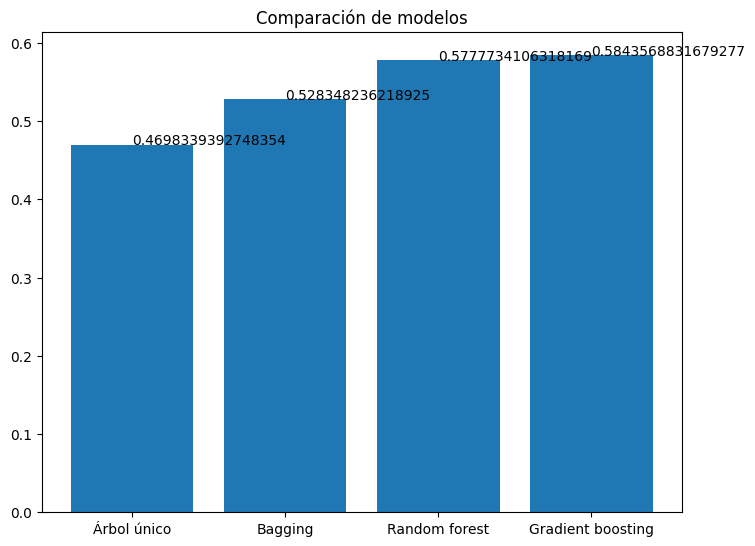

In [181]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['Árbol único','Bagging' ,'Random forest','Gradient boosting']
ejeY = [accuracy1,accuracy2,accuracy3,accuracy4]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

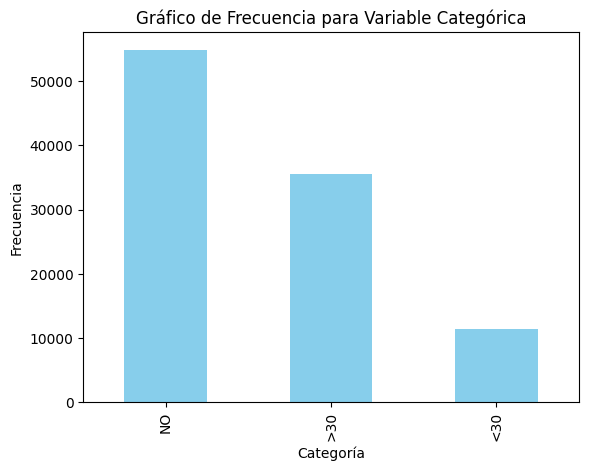

In [184]:
frequency = y.value_counts()
frequency.plot(kind='bar', color='skyblue')

# Configurar el gráfico
plt.title('Gráfico de Frecuencia para readmitted')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

plt.show()